In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Inital Checking of Data


In [2]:
url = 'https://raw.githubusercontent.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/master/USA_Housing.csv'
df = pd.read_csv(url)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


**Definition of variables**

- ‘Avg. Area Income’ – Avg. The income of the householder of the city house is located.
- ‘Avg. Area House Age’ – Avg. Age of Houses in the same city.
- ‘Avg. Area Number of Rooms’ – Avg. Number of Rooms for Houses in the same city.
- ‘Avg. Area Number of Bedrooms’ – Avg. Number of Bedrooms for Houses in the same city.
- ‘Area Population’ – Population of the city.
- ‘Price’ – Price that the house sold at.
- ‘Address’ – Address of the houses.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Checking for missing values to increase accuracy of model**

In [4]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

**Since there are no missing data, we can check for the central tendency of data to have our baseline.
We can use '.describe()' method to check for the values and plot to check the distribution of the data.**

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


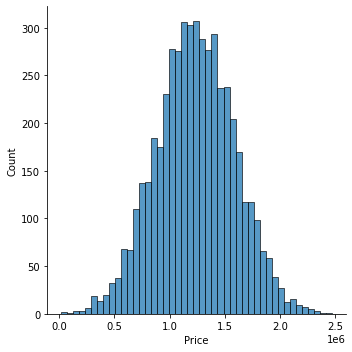

In [6]:
sns.displot(df['Price'])

**Since the data is normally distributed we can proceed without needing to look for data-entry errors and/or outliers.**

## Checking for columns with correlation and Generating Model

In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

**Visualizing the relationship between price and other factors**

Text(0.5, 1.0, 'Price vs Avg. Area Income')

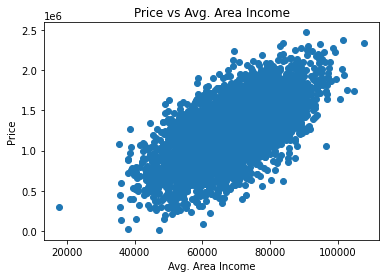

In [8]:
plt.scatter(y=df['Price'],x=df['Avg. Area Income'])
plt.xlabel("Avg. Area Income")
plt.ylabel("Price")
plt.title("Price vs Avg. Area Income")

Text(0.5, 1.0, 'Price vs Avg. Area House Age')

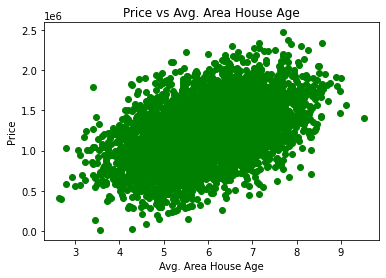

In [9]:
plt.scatter(y=df['Price'],x=df['Avg. Area House Age'],color='g')
plt.xlabel("Avg. Area House Age")
plt.ylabel("Price")
plt.title("Price vs Avg. Area House Age")

Text(0.5, 1.0, 'Price vs Avg. Area Number of Rooms')

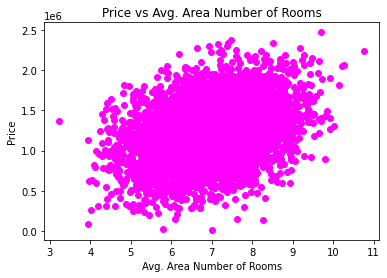

In [10]:
plt.scatter(y=df['Price'],x=df['Avg. Area Number of Rooms'],color='magenta')
plt.xlabel("Avg. Area Number of Rooms")
plt.ylabel("Price")
plt.title("Price vs Avg. Area Number of Rooms")

Text(0.5, 1.0, 'Price vs Avg. Area Number of Bedrooms')

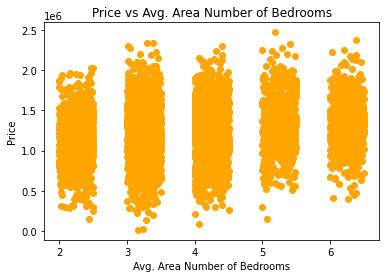

In [11]:
plt.scatter(y=df['Price'],x=df['Avg. Area Number of Bedrooms'],color='orange')
plt.xlabel("Avg. Area Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price vs Avg. Area Number of Bedrooms")

Text(0.5, 1.0, 'Price vs Area Population')

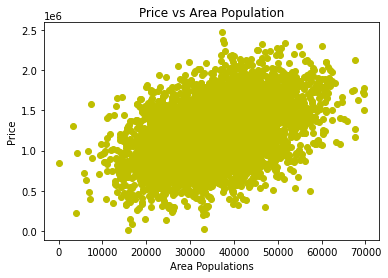

In [12]:
plt.scatter(y=df['Price'],x=df['Area Population'],color='y')
plt.xlabel("Area Populations")
plt.ylabel("Price")
plt.title("Price vs Area Population")

We can see that all factors are directly proportional with price. Meaning the price increase with the factors.

Next, we need to check what factors are strongly correlated with price.

In [13]:
print(df['Price'].corr(df['Avg. Area Income']))
print(df['Price'].corr(df['Avg. Area House Age']))
print(df['Price'].corr(df['Avg. Area Number of Rooms']))
print(df['Price'].corr(df['Avg. Area Number of Bedrooms']))
print(df['Price'].corr(df['Area Population']))


0.639733778249894
0.45254253717875587
0.33566445336675976
0.17107102765855592
0.4085558793165563


Values greater than .5 have strong relationship.
Values between .3 and .5 have moderate relationship.

For this example, 'Avg. Area Number of Bedrooms' will be excluded.

**Assigning the dependent and independent variables**

We will assign the factors we are considering to X  and price as y and use them to train and test the model.


To check the behavior of the model when introducing new data, we can use 'train_test_split'
 - Train data - creates the model
 - Test data - checks the accuracy of the model

In [14]:
from sklearn.model_selection import train_test_split

X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In this example, we will use 40% of the data to test the model and 60% for training.
<br>

**Generating and Training the LinearRegression Model**

In [15]:
from sklearn.linear_model import LinearRegression 

line_eq = LinearRegression() 

line_eq.fit(X_train,y_train) 

LinearRegression()

**Checking the accuracy of the model visually**

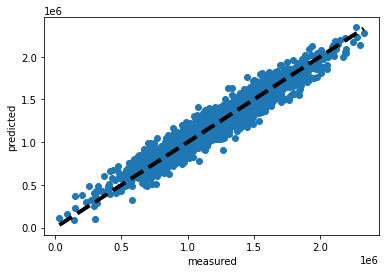

In [16]:
# https://sweetcode.io/simple-multiple-linear-regression-python-scikit/
y_predicted = line_eq.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

Checking the performance of our data visually, we can see the predictions as a straight line passing through all of the training data. <br>This means that our model performed well.

**Checking the accuracy of the model using coefficient of determination**

We can use R^2 or coefficient of determination as a gauge of our model's accuracy.
<br> The closer it is to 1, the more accurate it is.
<br> Luckily, scikit has a built in [method](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html#sklearn.dummy.DummyRegressor.score) to calculate it.

In [17]:
line_eq.score(X_test,y_test)

0.9176956255444629

Since, the R^2 is close to 1 we can proceed to use this model and test using a row of our data.

**Generating the formula**

The general linear formula is $y=mx+b$
<br>
<br> We need to get the intercept and the coeffecient.
<br> Coefficient depends on how many factors we consider.
<br> Since we considered 4 factors, we will need 4 coefficients.

**To get the intercept:**

In [18]:
print(line_eq.intercept_)

-2640459.277768251


**To get the coefficients:**

In [19]:
pd.DataFrame(line_eq.coef_,X.columns,columns=['Coefficient'])

,Coefficient
Avg. Area Income,21.528348
Avg. Area House Age,164953.468397
Avg. Area Number of Rooms,123655.616725
Area Population,15.143711


**We can also use the coefficients directly by accessing it's location**

In [20]:
print(line_eq.coef_)

[2.15283483e+01 1.64953468e+05 1.23655617e+05 1.51437108e+01]


**From the coefficients and intercept, we can now represent the model.**

 - coeff_1 = line_eq.intercept_[0]
 - coeff_2 = line_eq.intercept_[1]
 - coeff_3 = line_eq.intercept_[2]
 - coeff_4 = line_eq.intercept_[3]

 - x1 = Avg. Area Income
 - x2 = Avg. Area House Age
 - x3 = Avg. Area Number of Rooms
 - x4 = Area Population

 - intercept_price = line_eq.intercept_
 - y = price prediction

Formula:
> y = (coeff_1 * x1) + (coeff_2 * x2) + (coeff_3 * x3) + (coeff_4 * x4) + intercept_price


In [21]:
def price_predict(income,age,rooms,population):
    return round((line_eq.coef_[0] * income) + (line_eq.coef_[1] * age) + (line_eq.coef_[2] * rooms) + (line_eq.coef_[3] * population) + line_eq.intercept_,2)
         
    

**To check our formula we will use the first row on our dataset**

In [22]:
X_test.iloc[0]

Avg. Area Income             66774.995817
Avg. Area House Age              5.717143
Avg. Area Number of Rooms        7.795215
Area Population              36788.980327
Name: 1718, dtype: float64

In [23]:
y_func = price_predict(66774.995817,5.717143,7.795215,36788.980327)
y_func

1261202.45

We will compare our formula with the built-in 'predict' method to check accuracy. 
<br>Since we used the first row of the 'X_test' we will only print the first value of the result.

In [24]:
y_method = line_eq.predict(X_test)
y_predict = y_method[0]
round(y_predict,2)

1261202.46

Percent difference of the function and predict method:

In [25]:
print((y_predict-y_func)*100/y_predict)

9.331649926382298e-07


**Since this data is from 2019, we need to include the inflation to estimate future prices**
<br>We will use te average inflation rate as 3.6%: https://www.inflationtool.com/us-dollar
> inflation rate = 3.6 ** (target year - 2019)

To avoid negative price, we will set the minimum value to USD15938.66 which is the smallest value in the dataset.
<br>This is done in case the value of the price becomes negative after the computation.
<br>The minimum value will also be adjusted according to inflation

In [26]:
min_value = price_predict(17796.631190,2.644304,3.236194,172.610686)
min_value

-1418352.56

In [27]:
def price_predict_inf(income,age,rooms,population,tgt_year):
    y = (line_eq.coef_[0] * income) + (line_eq.coef_[1] * age) + (line_eq.coef_[2] * rooms) + (line_eq.coef_[3] * population) + line_eq.intercept_
    inf_rate = 1 + (0.036 ** (tgt_year-2019))
    if y < 0:
        y = 15938.66
    est_price = y * inf_rate
    return '${:,.2f}'.format(est_price)

In [28]:
print(price_predict_inf(66774.995817,5.717143,7.795215,36788.980327,2022))

$1,261,261.29


## Conclusion

We have tested that our model is accurate, and since the difference between the built in function and our formula is small.
<br>We can safely say that, inside our area of interest, we can use this formula to estimate the price of the property:
<br>
$y=((x1 * 21.53) + (x2 * 164953.47) + (x3 * 	123655.62) + (x4 * 15.14) - 2640459.28)*(1 + inf)$
<br>
<br>
Where:
 - x1 = Avg. Area Income
 - x2 = Avg. Area House Age
 - x3 = Avg. Area Number of Rooms
 - x4 = Area Population
 - inf = 0.036 ** (target_year - 2019)

**Testing the model**

<br>Assuming a person would like to know the price of a house with:
<br>Avg. Area Income – 50000
<br>Avg. Area House Age – 8
<br>Avg. Area Number of Rooms’ – 4
<br>Area Population’ – 8000
<br>Target year = 2030
<br><br>The value will be:

In [29]:
print(price_predict_inf(50000,8,4,8000,2030))

$371,358.04
